#Assignment 1: Logistic Regression

## Dataset load & Plot

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

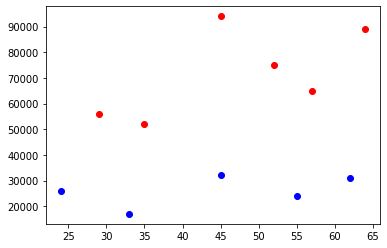

In [2]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
plt.show()

# Problem 1-1. Logistic regression model using sklearn packages.

Train your data using LogisticRegression classes from skikit-learn library.


In [103]:
def learn_and_return_weights(X, y):
    from sklearn.linear_model import LogisticRegression
    # YOUR CODE COMES HERE
    # w: coefficient of the model to input features,
    # b: bias of the model
    model = LogisticRegression()
    model.fit(X, y)
    w = model.coef_
    b= model.intercept_
    w = w.reshape(2,1)

    return w, b


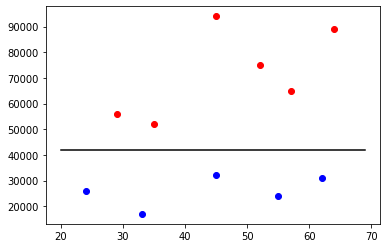

In [104]:
def plot_data_and_weights(X, y, w, b):
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

    x_lin = np.arange(20, 70)
    y_lin = -(0.5 + b + w[0] * x_lin) / w[1]

    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 1-2. Implement Logistic Regression Model

Implement Logistic Regression without using scikit-learn libraries.


In [119]:
def sigmoid(z):
    # YOUR CODE COMES HERE
     return 1 / (1+np.exp(-z))

def binary_cross_entropy_loss(y_pred, target):
    # YOUR CODE COMES HERE
    return np.sum(-(1/target.shape[0]) * (target * np.log(y_pred) + (1 - target) * np.log(1 - y_pred)))

def activation(z):
  z = -z
  if z > np.log(np.finfo(z.dtype).max):
    return 0.0
  else:
    return 1 / (1 + np.exp(z))

def learn_and_return_weights_numpy(X, Y, lr=.01, iter=100000):
    # YOUR CODE COMES HERE
    # w: coefficient of the model to input features,
    # b: bias of the model
    w = np.ones(X.shape[1])
    b= 0

    for i in range(iter):
      for x_i, y_i in zip(X, Y):
        z= np.sum(x_i * w) + b
        a= activation(z)
        err = -(y_i - a)
        w_grad = x_i * err
        b_grad = 1 * err
        w -= w_grad
        b -= b_grad

    return w, b

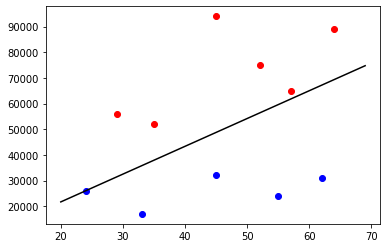

In [120]:
w, b = learn_and_return_weights_numpy(X, y)
plot_data_and_weights(X, y, w, b)